## Exercise 1

### <strong>Make Moons</strong>

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)

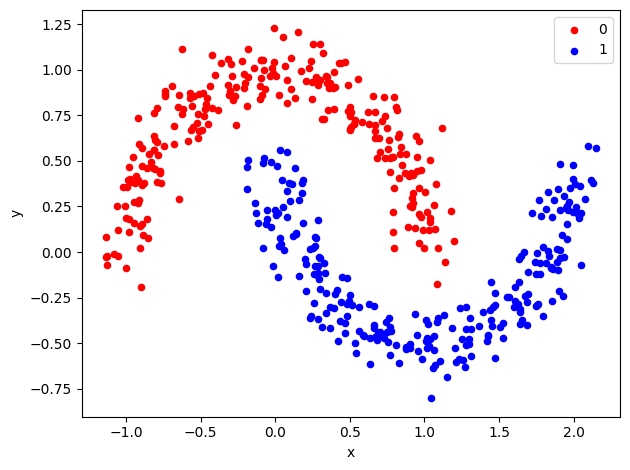

In [3]:
from matplotlib import pyplot as plt
from pandas import DataFrame

df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))

colors = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, c=colors[key])

plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### 1. Neural net

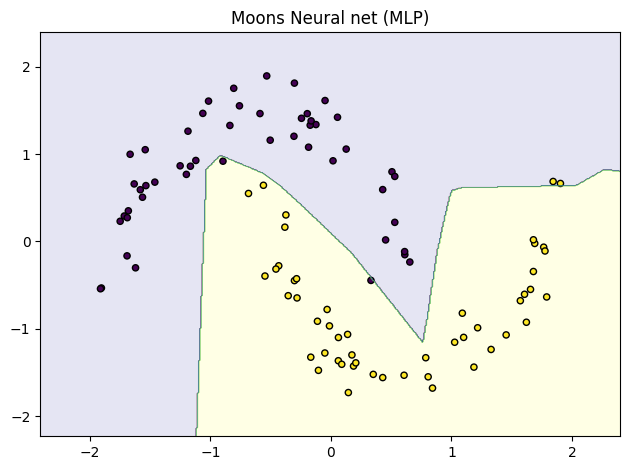

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.96      0.96      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

[[48  2]
 [ 2 48]]


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

from exercise1 import plot_decision_boundary

mlp_clf = MLPClassifier(
    hidden_layer_sizes=[10, 10],
    solver="lbfgs",
    alpha=0.0001,
    random_state=0)

mlp_clf.fit(X_train, y_train)
mlp_y_pred = mlp_clf.predict(X_test)

plot_decision_boundary(mlp_clf, X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=20)
plt.title('Moons Neural net (MLP)')
plt.tight_layout()
plt.show()

print(classification_report(y_test, mlp_y_pred))
print(confusion_matrix(y_test, mlp_y_pred))

##### 2. Logistic Regression

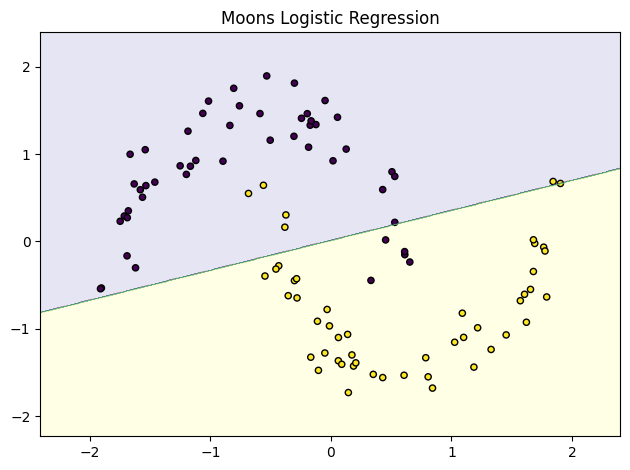

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        50
           1       0.90      0.90      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

[[45  5]
 [ 5 45]]


In [7]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix

from exercise1 import plot_decision_boundary

logreg = linear_model.LogisticRegression(
    C=1)

logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)

plot_decision_boundary(logreg, X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=20)
plt.title('Moons Logistic Regression')
plt.tight_layout()
plt.show()

print(classification_report(y_test, logreg_y_pred))
print(confusion_matrix(y_test, logreg_y_pred))

Logistisk regression opnår en højere præcision end forventet, med en nøjagtighed på 90%, hvilket er ok, men stadigvæk ikke lige så godt som det neurale netværk, hvilket jo også forventes.

##### 3. K-means

C:\Users\Mikkel\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Mikkel\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


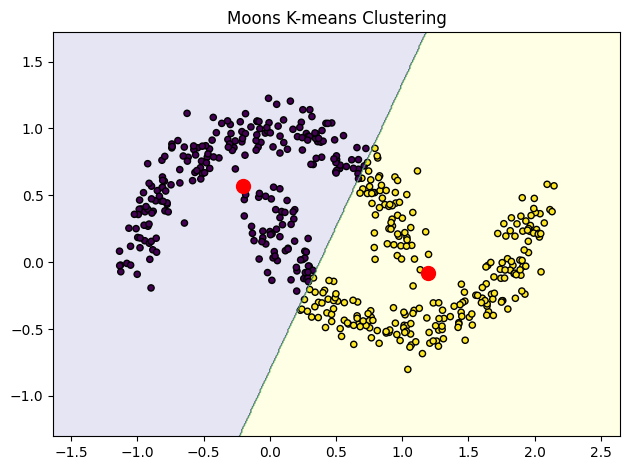

0.48423921327134695


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from exercise1 import plot_decision_boundary

kmeans = KMeans(
    n_clusters=2,
    n_init="auto",
    random_state=0)

kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

plot_decision_boundary(kmeans, X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='red', label='Cluster Centers')
plt.title("Moons K-means Clustering")
plt.tight_layout()
plt.show()

print(silhouette_score(X, kmeans.labels_))


##### 4. Decision Tree

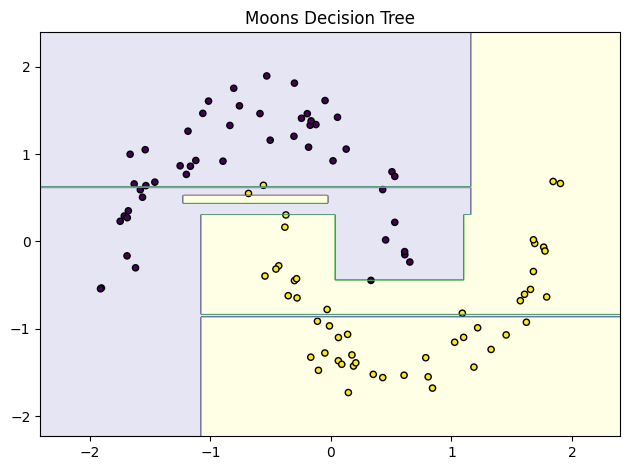

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.94      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

[[50  0]
 [ 3 47]]


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from exercise1 import plot_decision_boundary

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)

plot_decision_boundary(tree_clf, X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=20)
plt.title('Moons Decision Tree')
plt.tight_layout()
plt.show()

print(classification_report(y_test, tree_y_pred))
print(confusion_matrix(y_test, tree_y_pred))

#### 5. Random Forest

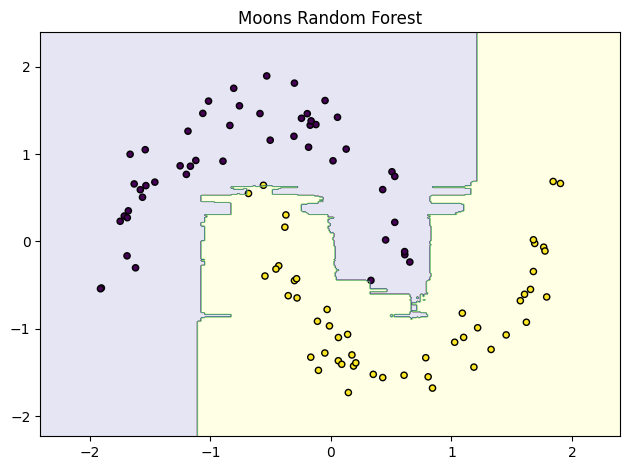

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

[[50  0]
 [ 1 49]]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from exercise1 import plot_decision_boundary

forest_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=0)

forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)

plot_decision_boundary(forest_clf, X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=20)
plt.title('Moons Random Forest')
plt.tight_layout()
plt.show()

print(classification_report(y_test, forest_y_pred))
print(confusion_matrix(y_test, forest_y_pred))


#### 6. SVM

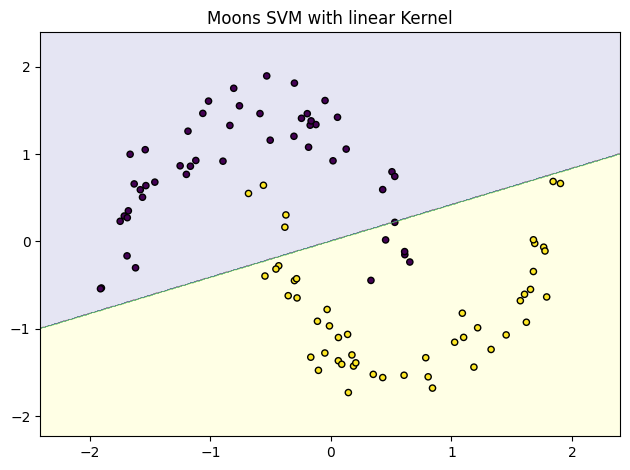

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.88      0.92      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

[[44  6]
 [ 4 46]]


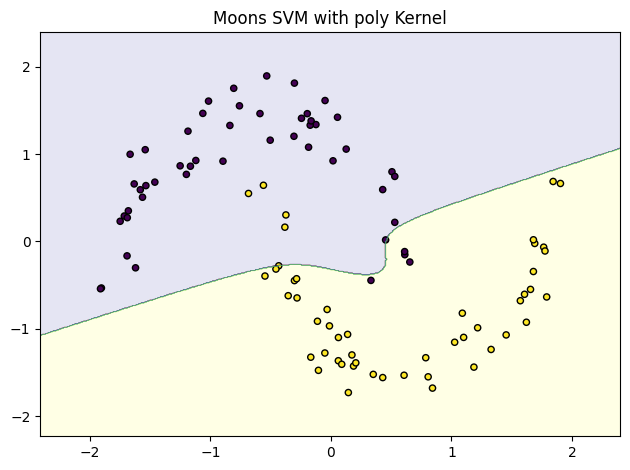

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        50
           1       0.92      0.92      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

[[46  4]
 [ 4 46]]


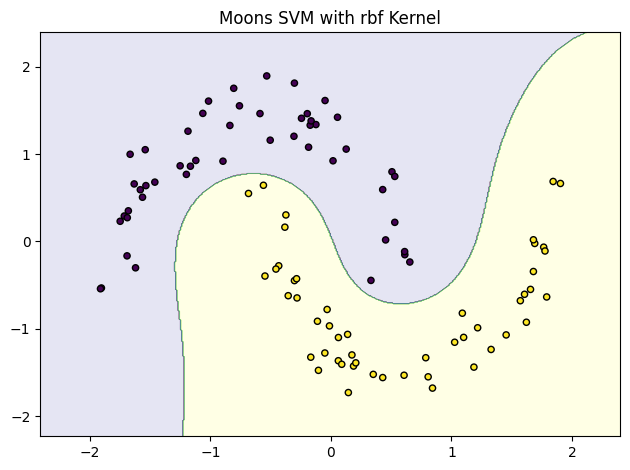

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[50  0]
 [ 0 50]]


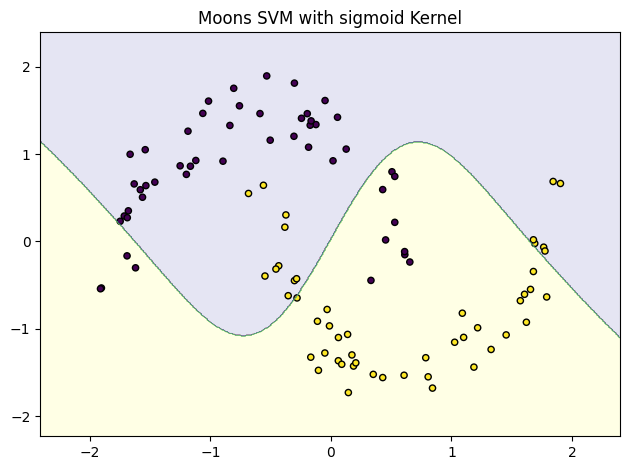

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        50
           1       0.72      0.68      0.70        50

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100

[[37 13]
 [16 34]]


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from exercise1 import plot_decision_boundary

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_clf = SVC(
        kernel=kernel,
        C=1)
    
    svm_clf.fit(X_train, y_train)
    svm_y_pred = svm_clf.predict(X_test)

    plot_decision_boundary(svm_clf, X_test)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=20)
    plt.title(f'Moons SVM with {kernel} Kernel')

    plt.tight_layout()
    plt.show()

    print(classification_report(y_test, svm_y_pred))
    print(confusion_matrix(y_test, svm_y_pred))

### <strong>Make Circles</strong>

In [12]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=.05, random_state=0)

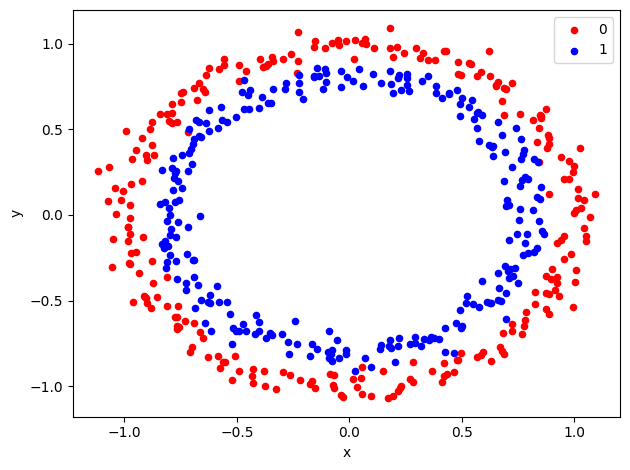

In [13]:
from matplotlib import pyplot as plt
from pandas import DataFrame

df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))

colors = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, c=colors[key])

plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### SVM

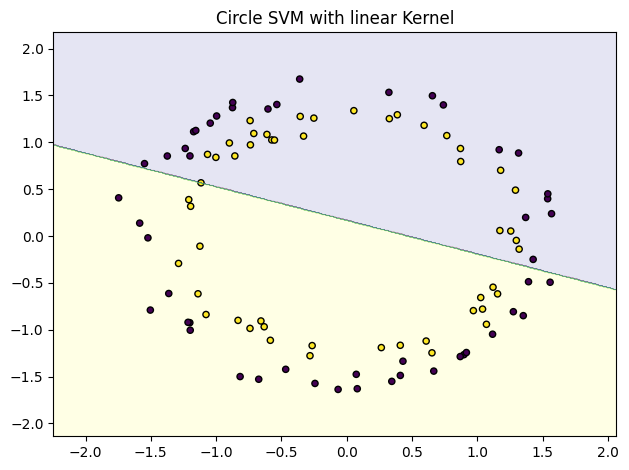

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        50
           1       0.46      0.46      0.46        50

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.46      0.46      0.46       100

[[23 27]
 [27 23]]


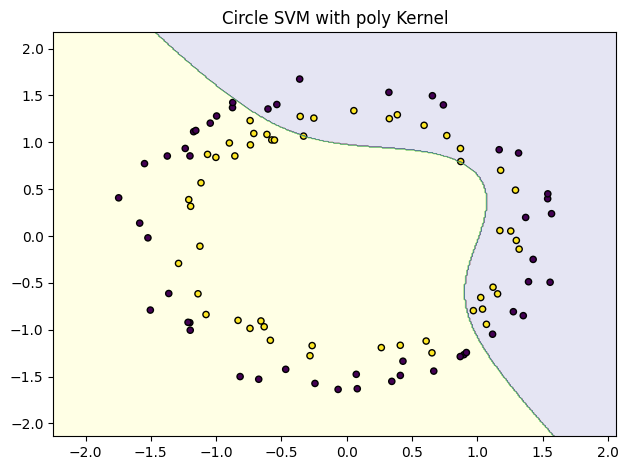

              precision    recall  f1-score   support

           0       0.46      0.36      0.40        50
           1       0.48      0.58      0.52        50

    accuracy                           0.47       100
   macro avg       0.47      0.47      0.46       100
weighted avg       0.47      0.47      0.46       100

[[18 32]
 [21 29]]


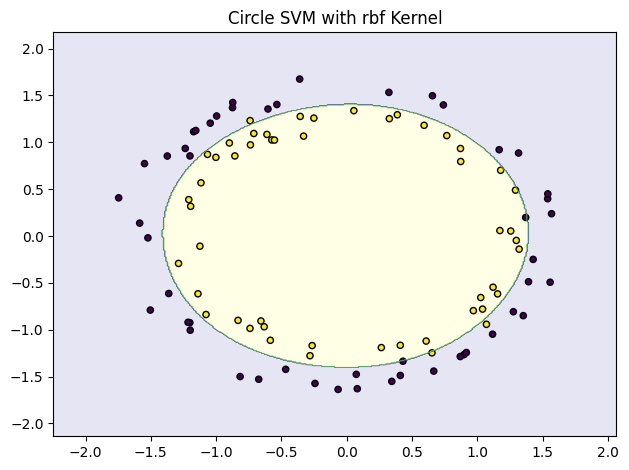

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.98      0.94      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

[[49  1]
 [ 3 47]]


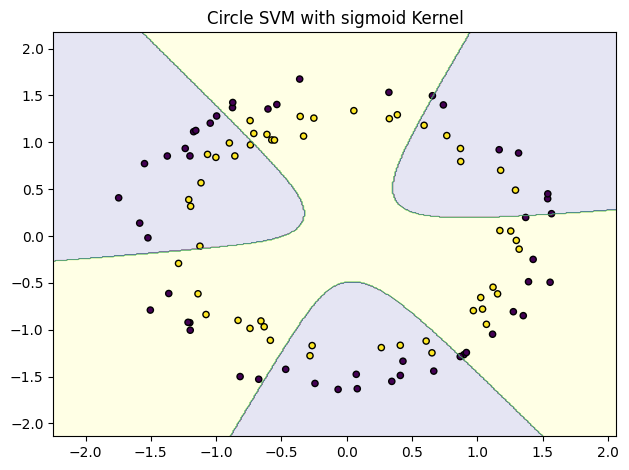

              precision    recall  f1-score   support

           0       0.56      0.54      0.55        50
           1       0.56      0.58      0.57        50

    accuracy                           0.56       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.56      0.56      0.56       100

[[27 23]
 [21 29]]


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from exercise1 import plot_decision_boundary

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_clf = SVC(
        kernel=kernel,
        C=1)
    
    svm_clf.fit(X_train, y_train)
    svm_y_pred = svm_clf.predict(X_test)

    plot_decision_boundary(svm_clf, X_test)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=20)
    plt.title(f'Circle SVM with {kernel} Kernel')

    plt.tight_layout()
    plt.show()

    print(classification_report(y_test, svm_y_pred))
    print(confusion_matrix(y_test, svm_y_pred))


## Exercise 2

Denne opgave går ud på at bruge machine learning til at forudsige, om en passager ombord på Titanic overlevede eller omkom, baseret på forskellige features i et datasæt.

Til dette bruges datasættet 'Titanic', der i alt indeholder 12 features, hvor opgaven er at forudsige en enkelt feature, 'Survived'. De øvrige 11 features i datasættet er:

'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'.

##### 1. Indsamling af data

Data hentes fra .csv-fil og indlæses i en DataFrame

In [1]:
import pandas as pd

file = 'titanic_800.csv'
data = pd.read_csv(file, sep=',', header=0)

##### 2. Forberedelse af data

Inden vi kan arbejde med dette data, er det vigtigt at forberede det.

Starter med at undersøge datasættet for eventuelle manglende værdier

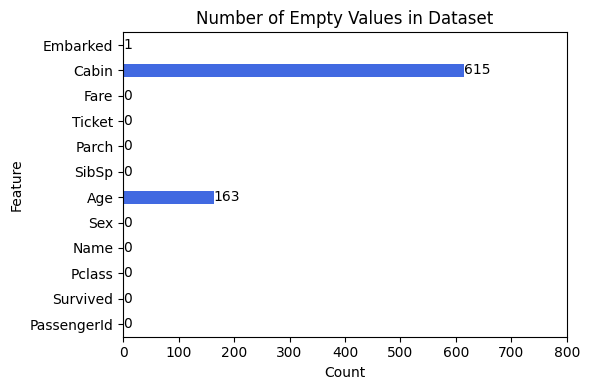

In [2]:
from exercise2 import plot_empty_values

plot_empty_values(data)

Det ses, at <strong>Embarked</strong>, <strong>Age</strong>, og <strong>Cabin</strong> mangler værdier.

- For <strong>Embarked</strong> og <strong>Age</strong> kan vi prøve at udføre imputation for at udfylde de manglende værdier.
- Da <strong>Cabin</strong> har så mange tomme værdier, at det nok er bedst helt at fjerne den, da der ikke er nok information at arbejde med.

Udover <strong>Cabin</strong> fjernes også følgende features:
- <strong>PassengerId</strong> er et unikt id for hver passager, og indeholder ingen information, der er relevant for at forudsige overlevelse.
- <strong>Name</strong> er i sig selv ikke relevant for forudsigelsen, og fjernes derfor.
- <strong>Ticket</strong> fjernes også, da dette blot er et billetnummer, og derfor sandsynligvis ikke relevant for analysen.

In [3]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Udfører imputation på 'Age' og 'Embarked', hvor manglende værdier i 'Age' bliver erstattet med medianen, og manglende værdier i 'Embarked' bliver erstattet med den hyppigste kategori: 

In [4]:
age_median = data['Age'].median().astype(int)
embarked_mode = data['Embarked'].mode()[0]

print(f'Age: {age_median}')
print(f'Embarked: {embarked_mode}')

data['Age'].fillna(age_median, inplace=True)
data['Embarked'].fillna(embarked_mode, inplace=True)

Age: 28
Embarked: S


Laver feature encoding for at omdanne ikke-numeriske data (som tekst eller kategoriske værdier) til numeriske værdier

In [5]:
data['Sex'].replace({'female': 0, 'male': 1}, inplace=True)
data['Embarked'] = pd.factorize(data['Embarked'])[0]

Da det er <strong>Survived</strong> vi vil forsøge at forudsige, så trækkes denne ud af datasættet og sættes som label

In [6]:
y_values = data['Survived']
data.drop('Survived', axis=1, inplace=True)

Opdeling af data i trænings- og testsæt i en 80/20-fordeling

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, y_values, test_size=0.2, random_state=0)

Skalering af data for at forbedre det til træning af model

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### 3. Valg af model

Til at oprette modellen benyttes et neuralt netværk (MLP) som algoritme, da det er i stand til at håndtere komplekse datarelationer, hvilket i dette tilfælde er relevant, da datasættet indeholder forskellige kategorier af information, som potentielt kan fortælle noget om sammenhænge med overlevelse.

Andre algoritmer, der kunne overvejes, inkluderer logistisk regression, decision trees, random forests og support vector machines (SVM)

In [9]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation='relu',  # 'identity', 'logistic', 'tanh', 'relu'
    max_iter=400,
    random_state=0,
    batch_size=1)

##### 4. Træning af model

Træn modellen på træningssættet, og udfører forudsigelser på testsættet

In [10]:
mlp_clf.fit(X_train, y_train.values.ravel())
y_pred = mlp_clf.predict(X_test)

##### 5. Evaluering af model

Evaluerer modellens præstation ved hjælp af en confusion matrix og en classification report

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       101
           1       0.79      0.76      0.78        59

    accuracy                           0.84       160
   macro avg       0.83      0.82      0.82       160
weighted avg       0.84      0.84      0.84       160



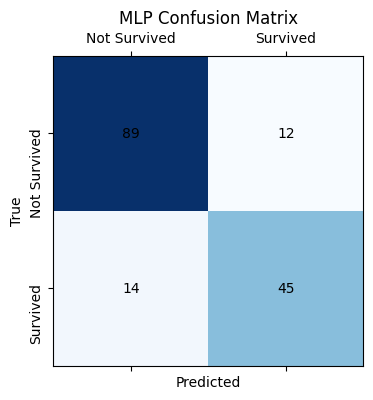

Hidden layers: (10, 10)
Activation: relu
Epochs: 400


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

from exercise2 import plot_confusion_matrix

print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix, 'MLP')

mlp_params = mlp_clf.get_params()

print(f'Hidden layers: {mlp_params["hidden_layer_sizes"]}')
print(f'Activation: {mlp_params["activation"]}')
print(f'Epochs: {mlp_params["max_iter"]}')

Modellen med to hidden layers, hver med 10 neuroner, relu-aktiveringsfunktion, og trænet i 400 epoker, opnår en rimlig accuracy på 84 %.

Det ses også, at den er bedre til at forudsige, hvem der omkom (survived=0), end den er til at forudsige, hvem der overlevede (survived=1)

##### 6. Eksperimentering

Vi kan også prøve at vælge en anden model, for at se, om den egner sig bedre til dette datasæt

Den første vi kan prøve er et decision tree.

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       101
           1       0.92      0.58      0.71        59

    accuracy                           0.82       160
   macro avg       0.86      0.77      0.79       160
weighted avg       0.84      0.82      0.81       160



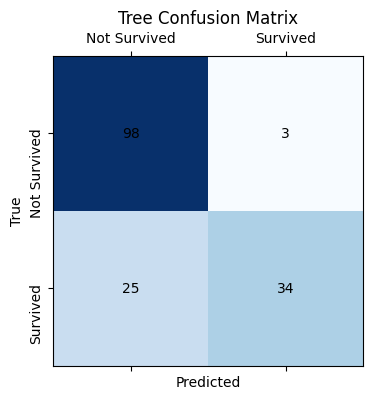

Max tree depth: 4


In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix, 'Tree')

tree_params = tree_clf.get_params()

print(f'Max tree depth: {tree_params["max_depth"]}')